In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 250})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('FINAL_ARXIV_2025_copy_updated.csv')

In [4]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,comments,journals,num_checks
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01,"19 pages, 12 figures, accepted for publication...",NaN,0
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01,Accepted for publication in IEEE Transactions ...,NaN,0
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Proceeding presented at the 8th Heidelberg Int...,NaN,0
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,"19 pages, 12 figures, ApJ accepted",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18329,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,NaN,[],2025-12-22,NaN,NaN,0
18330,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,NaN,['Active galactic nuclei (16) - Light curves (...,2025-12-22,"16 pages, 13 figures, accepted for publication...",NaN,0
18331,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['cosmological parameters from LSS – power spe...,2025-12-22,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0
18332,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,NaN,['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,2025-12-22,"18 pages, 18 figures",NaN,0


In [5]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [7]:
print(data['submitted_journal'].unique())

['AAS Journals' nan
 'IEEE Transactions on Applied Superconductivity for ASC2024 special issue'
 'appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara'
 'ApJ' 'A&A' 'Monthly Notices of the Royal Astronomical Society (MNRAS)'
 'Astronomy & Astrophysics' 'PASP' 'MNRAS'
 'Astronomy & Astrophysics (A&A)' 'ApJL' 'AJ Jan 23 2025'
 'the Open Journal of Astrophysics'
 'Astronomy & Astrophysics on 20 January' 'MNRAS (23 January 2025)'
 'ApJ January 22' 'the Journal of High Energy Astrophysics' 'PRD' 'JHEAP'
 'the Astrophysical Bulletin journal' 'AJ' 'Astronomy and Astrophysics'
 'the Astrophysical Journal' 'Astronomy and Astrophysics Letters'
 'Astronomy & Astrophysics (16 pages' 'Astronomy & Astrophysics (18 pages'
 'JOSS' 'PASA' 'MRNAS' 'EPJ Web Conf' 'ApJS' 'The Astrophysical Journal'
 'Astronomical Data Analysis Software and Systems (ADASS) XXXIV 2024'
 'Research Notes of the AAS' 'Astronomy and Astrophysics (A&A)'
 'MNRAS in this form'
 'ApJ- this is the revised ve

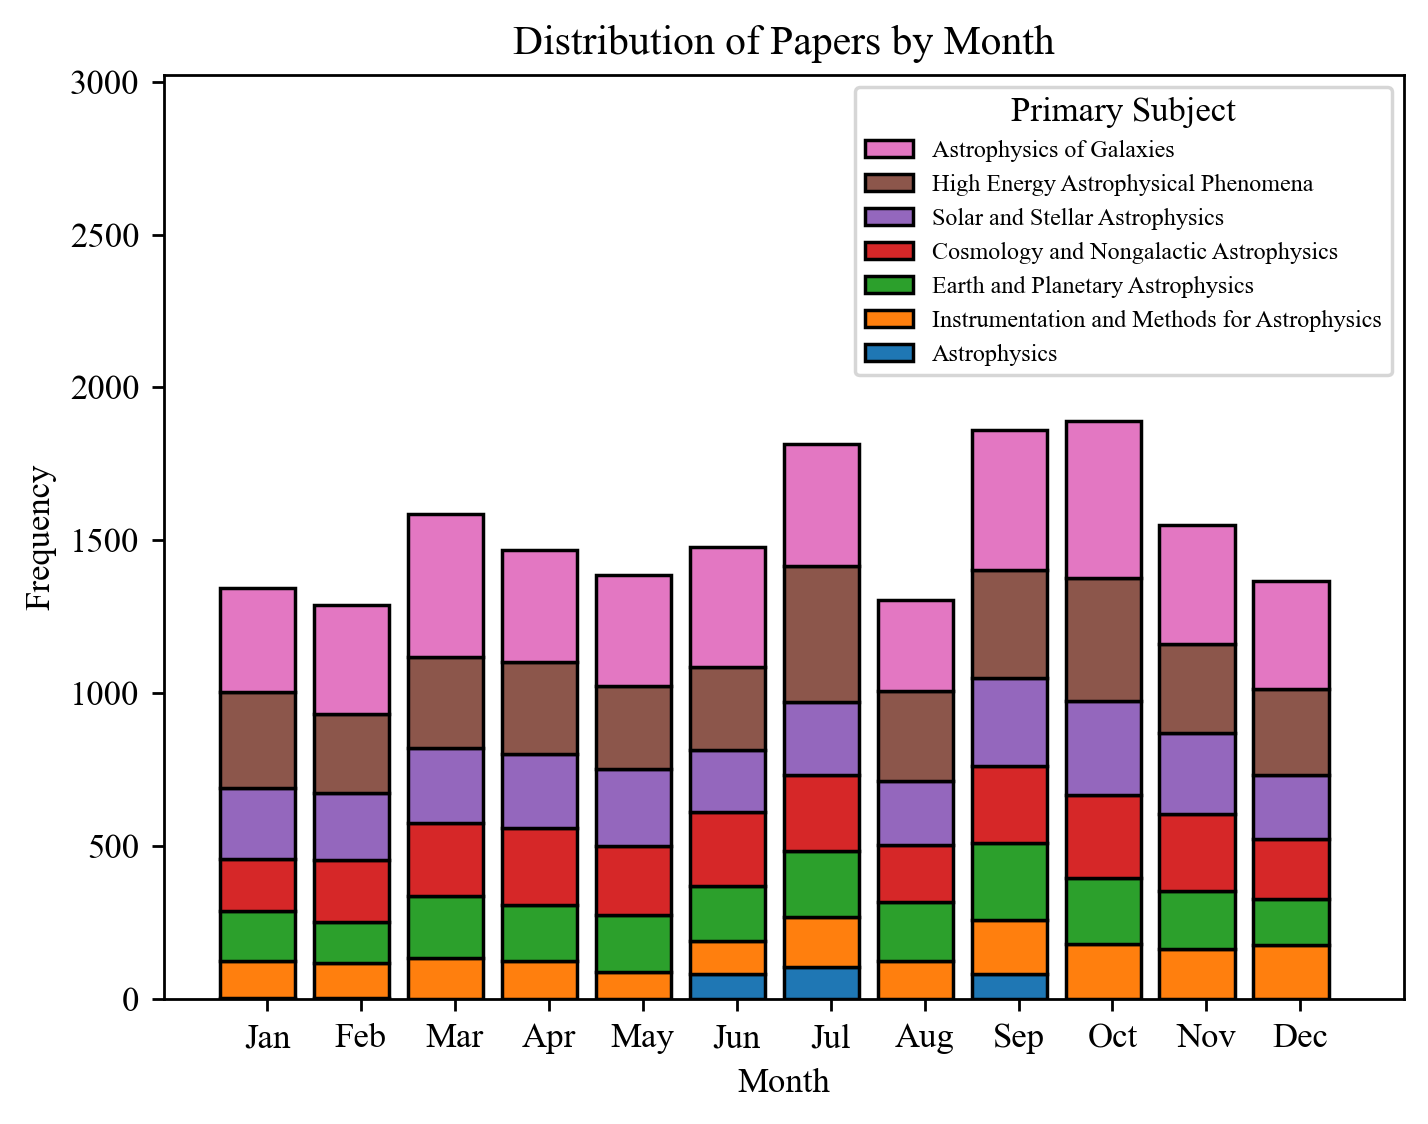

In [21]:
subjects = data['primary_subject'].unique()

# Calculate total counts to sort
subject_counts = data['primary_subject'].value_counts()
# Sort subjects by count (ascending for largest at top in standard stack, or descending)
sorted_subjects = subject_counts.sort_values(ascending=True).index.tolist()

data_by_subject = [data[data['primary_subject'] == s]['month'] for s in sorted_subjects]

bins = np.arange(0.5, 13.5, 1)
plt.hist(data_by_subject, bins=bins, stacked=True, edgecolor='black', label=sorted_subjects, width=0.8)
plt.title('Distribution of Papers by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Increase y-axis limit to make room for the legend
plt.ylim(0, data['month'].value_counts().max() * 1.6)

# Reverse legend to match visual stack order (top to bottom)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Primary Subject', loc='upper right', fontsize='x-small')
plt.show()

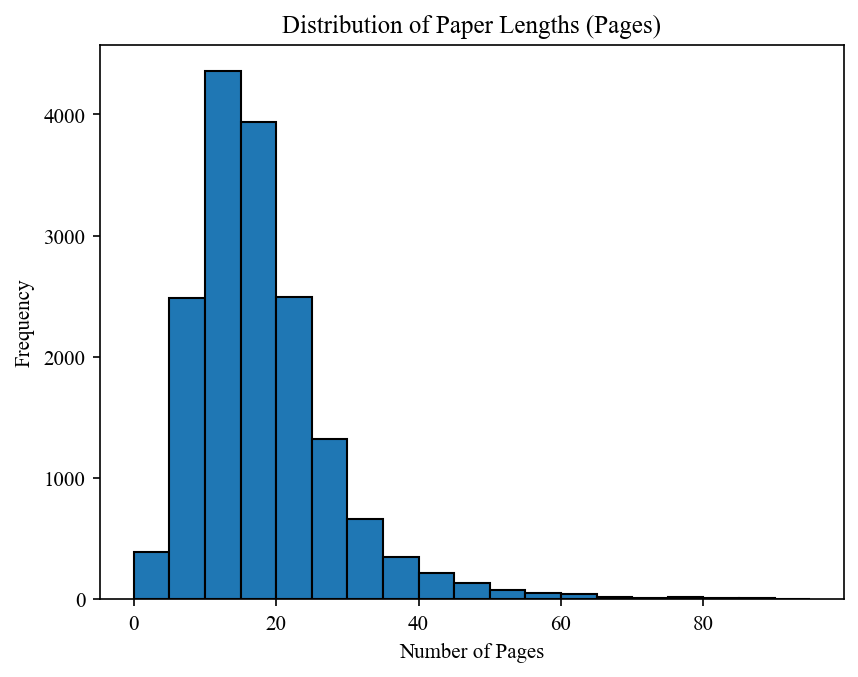

In [4]:
bins = np.arange(0, 100, 5)
plt.hist(data['pages'], bins=bins, edgecolor='black')
plt.title('Distribution of Paper Lengths (Pages)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

In [5]:
data['tables'] = data['tables'].fillna(0)
data['pages'] = data['pages'].fillna(0)

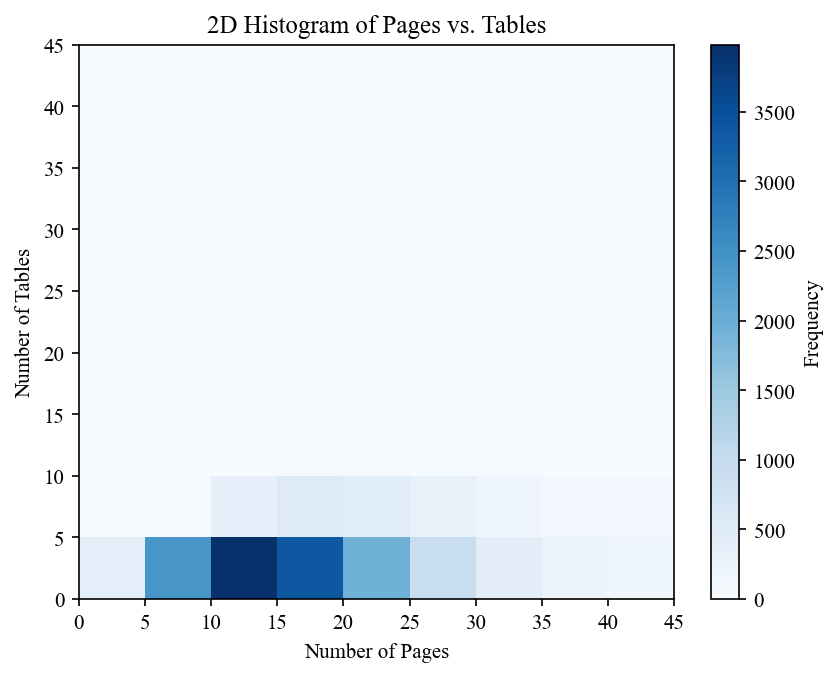

In [6]:
bins = np.arange(0, 50, 5)
plt.hist2d(data['pages'], data['tables'], bins=[bins, bins], cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.show()

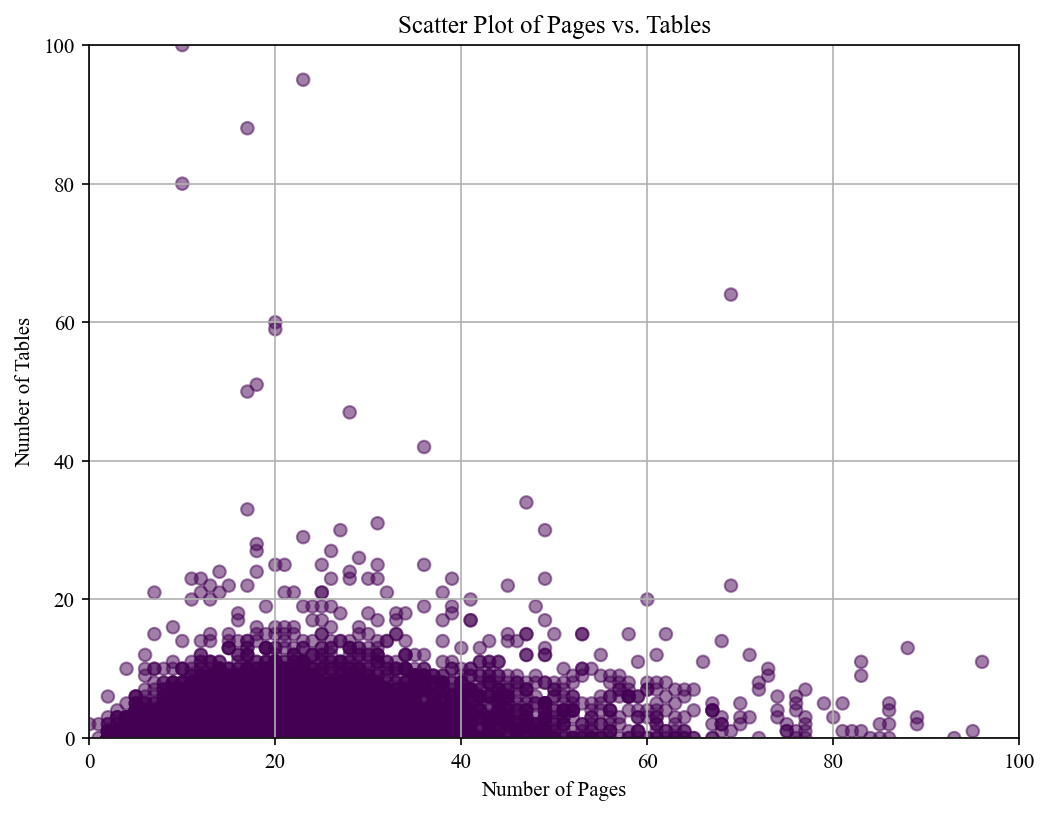

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['pages'], data['tables'], c=data['figures'], alpha=0.5, cmap='viridis')
plt.title('Scatter Plot of Pages vs. Tables')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Tables')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()